#Project
# 0. Load dataset




In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/projectML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/projectML


#1. Import libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.callbacks import Callback
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

#2. Check_out dataset


In [3]:
USAhousing = pd.read_csv('USA_Housing.csv')
USAhousing.head()

# Hàm làm tròn giá trị
def round_to_even(value):
    rounded_value = round(value)
    if rounded_value % 2 != 0:
        return rounded_value + 1 if value > rounded_value else rounded_value - 1
    return rounded_value

# Làm tròn các giá trị ở cột 'Avg. Area Number of Bedrooms'
USAhousing['Avg. Area Number of Bedrooms'] = USAhousing['Avg. Area Number of Bedrooms'].apply(round_to_even)
USAhousing['Avg. Area Number of Bedrooms'] = USAhousing['Avg. Area Number of Bedrooms'].apply(round_to_even)


# Kiểm tra dữ liệu bị thiếu
missing_values = USAhousing.isnull().sum()
numeric_cols = USAhousing.select_dtypes(include=['number']).columns
USAhousing[numeric_cols] = USAhousing[numeric_cols].fillna(USAhousing[numeric_cols].mean())
missing_values_after = USAhousing.isnull().sum()

#2.2 info,discribe,columns **dataset**

In [4]:
# code
USAhousing.info()

print("---------------------------")
USAhousing.columns

USAhousing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   int64  
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 273.6+ KB
---------------------------


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,4.141600,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.274784,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,4.000000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.000000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.000000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.000000,69621.713378,2.469066e+06


#3. Exploratory Data Analysis (EDA)

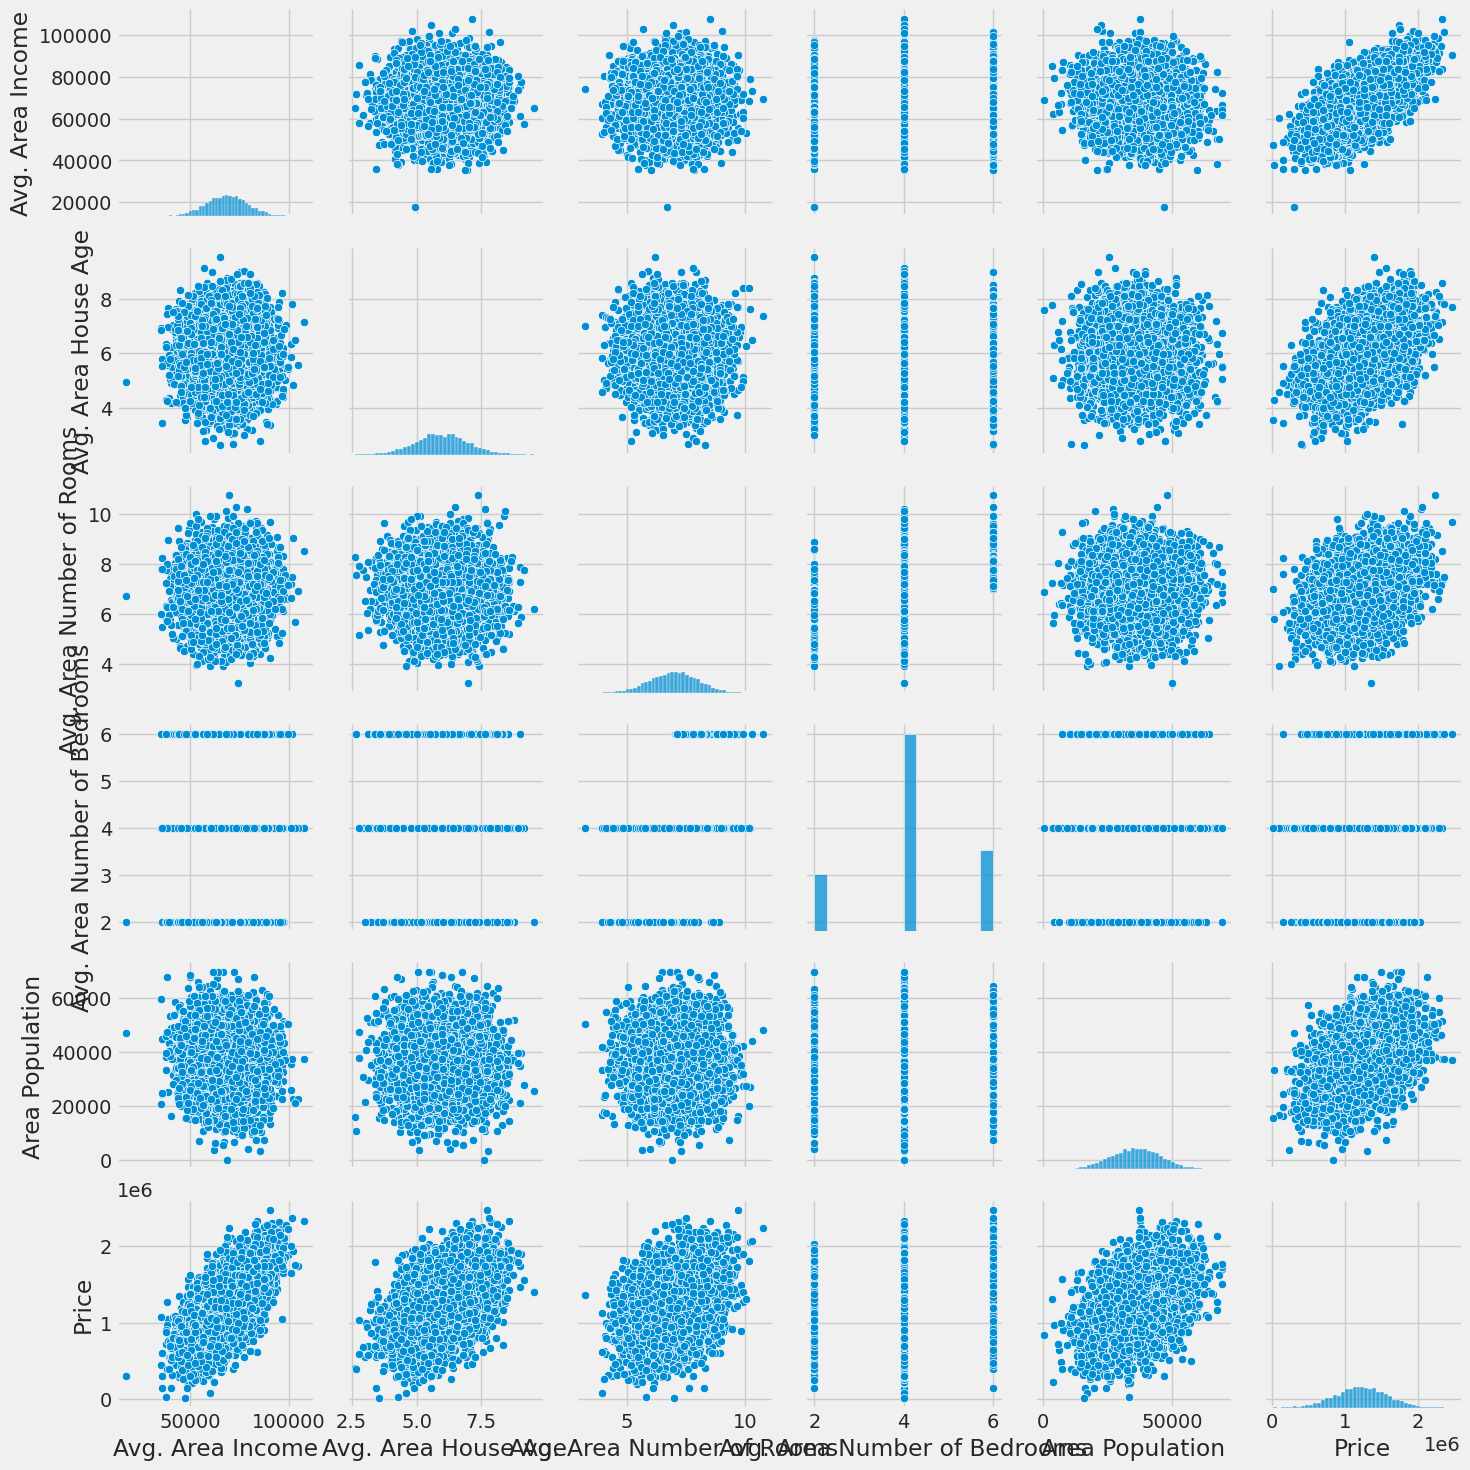

In [5]:
# code
sns.pairplot(USAhousing)

#4. Train Test Split


In [6]:

X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# 5. Linear Regression

In [8]:
# chuẩn hóa dữ liệu
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
# Hệ số hồi quy
print("Coefficients:", lin_reg.intercept_)
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficients: 1228219.1492415662


,Coefficient
Avg. Area Income,232707.217555
Avg. Area House Age,163843.829930
Avg. Area Number of Rooms,121548.646226
Avg. Area Number of Bedrooms,1795.262969
Area Population,151230.974190


In [10]:
# pred = lin_reg.predict(X_test)
# pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')
# pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 81129.39865849353
MSE: 10063816935.186794
RMSE: 100318.57721871255
R2 Square 0.9147208771066847
__________________________________
Train set evaluation:
_____________________________________
MAE: 81470.91541657102
MSE: 10291194292.75388
RMSE: 101445.52376893659
R2 Square 0.9192660924868992
__________________________________


# 6. Artficial Neural Network

In [17]:
epochs = 200
batch_size = 32

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

check_point_path = "model.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(check_point_path, save_best_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

model = Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=["mae", "mape"])

r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              batch_size=batch_size,
              epochs=epochs,
              callbacks=[model_checkpoint, early_stop])

Epoch 1/200
110/110 [==============================] - 2s 8ms/step - loss: 1635992338432.0000 - mae: 1228219.0000 - mape: 100.0000 - val_loss: 1658249674752.0000 - val_mae: 1241063.6250 - val_mape: 100.0000
Epoch 2/200
110/110 [==============================] - 0s 3ms/step - loss: 1635991552000.0000 - mae: 1228218.6250 - mape: 100.0000 - val_loss: 1658248364032.0000 - val_mae: 1241063.2500 - val_mape: 100.0000
Epoch 3/200
110/110 [==============================] - 0s 4ms/step - loss: 1635989848064.0000 - mae: 1228217.8750 - mape: 100.0000 - val_loss: 1658246791168.0000 - val_mae: 1241062.7500 - val_mape: 99.9999
Epoch 4/200
110/110 [==============================] - 0s 4ms/step - loss: 1635987881984.0000 - mae: 1228217.2500 - mape: 99.9999 - val_loss: 1658244825088.0000 - val_mae: 1241061.8750 - val_mape: 99.9998
Epoch 5/200
110/110 [==============================] - 0s 4ms/step - loss: 1635985915904.0000 - mae: 1228216.6250 - mape: 99.9997 - val_loss: 1658241548288.0000 - val_mae: 124

In [18]:
model.load_weights(check_point_path)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

110/110 [==============================] - 0s 2ms/step
Test set evaluation:
_____________________________________
MAE: 144488.23186338885
MSE: 32780467811.99214
RMSE: 181053.77049924186
R2 Square 0.7222237287261072
__________________________________
Train set evaluation:
_____________________________________
MAE: 145997.33071592753
MSE: 34259340120.37387
RMSE: 185092.78786698813
R2 Square 0.7312371802478146
__________________________________


#7. Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=30)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 94824.7673672506
MSE: 14292824006.804214
RMSE: 119552.59933102339
R2 Square 0.8788849695082257
__________________________________
Train set evaluation:
_____________________________________
MAE: 37035.337507014716
MSE: 2289358872.866172
RMSE: 47847.245196209275
R2 Square 0.982040093477157
__________________________________


#8. Finally,
# *Cảm ơn thầy đã xem 🍀.*